## Predict sine wave by 1D CNN

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

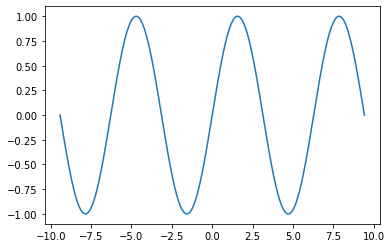

In [2]:
x = np.linspace(-3*np.pi,3*np.pi,1000)
y = np.sin(x)
plt.plot(x, y) 

In [3]:
input_len = 5 # 入力の長さ
X, Y = [], []
for i, _ in enumerate(x):
    if (i+input_len+1 >= len(x)):
        break
    X.append(y[i:i+input_len])
    Y.append(y[i+input_len+1])

In [4]:
split_index = int(len(X)*0.8)

train_x = X[:split_index]
train_y = Y[:split_index]
test_x = X[split_index:]
test_y = Y[split_index:]

In [5]:
train_x = np.array(train_x)
train_x = train_x.reshape(train_x.shape[0], -1, 1)
test_x = np.array(test_x)
test_x = test_x.reshape(test_x.shape[0], -1, 1)

train_y = np.array(train_y)
test_y = np.array(test_y)

In [6]:
test_y.shape

(199,)

In [7]:
train_x.shape[1:]

(5, 1)

In [13]:
input_shape = train_x.shape[1:]
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(32, 3, activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1))
model.compile(loss="mse", optimizer="adam")

In [9]:
# before training
score = model.evaluate(test_x, test_y)
print(score)

7/7 [==============================] - 0s 1ms/step - loss: 0.1454
0.14538204669952393


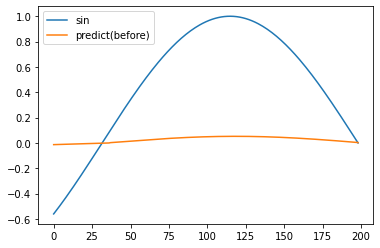

In [15]:
plt.plot(np.arange(len(test_y)), test_y, label="sin")
predict_y = model.predict(test_x)
predict_y = predict_y.reshape(predict_y.shape[:2])
plt.plot(np.arange(len(test_y)), predict_y, label="predict(before)")
plt.legend()

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3251
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0761
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 9/100
25/25 [==============================] - 0s 977us/step - loss: 0.0029
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 11/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 12/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 13/100
25/25 [===============

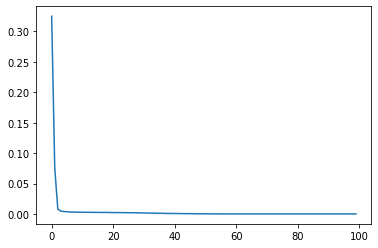

In [17]:
hist = model.fit(train_x, train_y, batch_size=32, epochs=100, verbose=1)
history = hist.history
plt.plot(hist.epoch, history["loss"], label="loss")

In [11]:
# after training
score = model.evaluate(test_x, test_y)
print(score)

7/7 [==============================] - 0s 1ms/step - loss: 6.9165e-06
6.916480742802378e-06


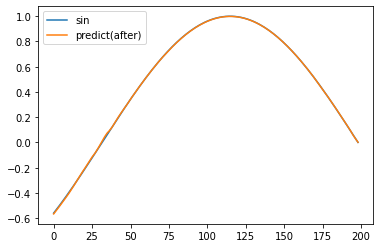

In [18]:
plt.plot(np.arange(len(test_y)), test_y, label="sin")
predict_y = model.predict(test_x)
predict_y = predict_y.reshape(predict_y.shape[:2])
plt.plot(np.arange(len(test_y)), predict_y, label="predict(after)")
plt.legend()